In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [104]:
# load the data frame
climate_df = pd.read_csv('climate_action_data.csv')

climate_df.head()
climate_df.dtypes
climate_df.info()
climate_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


(913, 10)

In [105]:
# Missing values
climate_df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [106]:
# Handling duplicates
# Remove duplicates based on the Sensor_ID and Date
climate_df = climate_df.drop_duplicates(subset=['Sensor_ID', 'Date'], keep='first')
climate_df.duplicated().sum()

np.int64(0)

In [107]:
# Replacing 'error' with NaN
climate_df = climate_df.replace('error', np.nan)
climate_df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

In [108]:
# Handle missing values
# Convert numeric columns to appropriate types and fill the missing values

numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    climate_df[col] = pd.to_numeric(climate_df[col], errors='coerce')
    climate_df[col] = climate_df[col].fillna(climate_df[col].median())

In [109]:
# Handle categorical columns 
# Fill missing date 
if climate_df['Date'].isnull().sum() > 0:
    climate_df['Date'] = climate_df['Date'].fillna(climate_df['Date'].mode()[0])

In [110]:
# Drop rows where Crop_Type is missing
climate_df = climate_df.dropna(subset=['Crop_Type'])

In [111]:
# Verify no missing values in selected columns
climate_df.isnull().sum()

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [112]:
# Export a cleaned dataset
climate_df.to_csv('cleaned_precision_agriculture_data.csv ', index=False)
climate_df.info()

climate_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sensor_ID                      798 non-null    object 
 1   Date                           798 non-null    object 
 2   Soil_Moisture(%)               798 non-null    float64
 3   Soil_pH                        798 non-null    float64
 4   Temperature(C)                 798 non-null    float64
 5   Humidity(%)                    798 non-null    float64
 6   Crop_Type                      798 non-null    object 
 7   Fertilizer_Recommended(kg/ha)  798 non-null    float64
 8   Irrigation_Recommended(mm)     798 non-null    float64
 9   Drone_Image_ID                 798 non-null    object 
dtypes: float64(6), object(4)
memory usage: 68.6+ KB


(798, 10)

In [113]:
# Exploratory data analysis
print("\nDescriptive Statistics")
print(climate_df[numeric_cols].describe())


Descriptive Statistics
       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        798.000000  798.000000      798.000000   798.000000   
mean          44.717619    6.243634       26.454511    59.996992   
std           20.452047    1.020958        4.855973    17.414296   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.947500    5.322500       22.300000    45.925000   
50%           45.410000    6.260000       26.600000    59.600000   
75%           62.555000    7.080000       30.575000    75.175000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     798.000000                  798.000000  
mean                       87.335338                   17.410777  
std                        34.798297                    7.149949  
min                        30.000000                    5.000000  
25%                        5

Text(0.5, 1.0, 'Histogram of Soil Moisture')

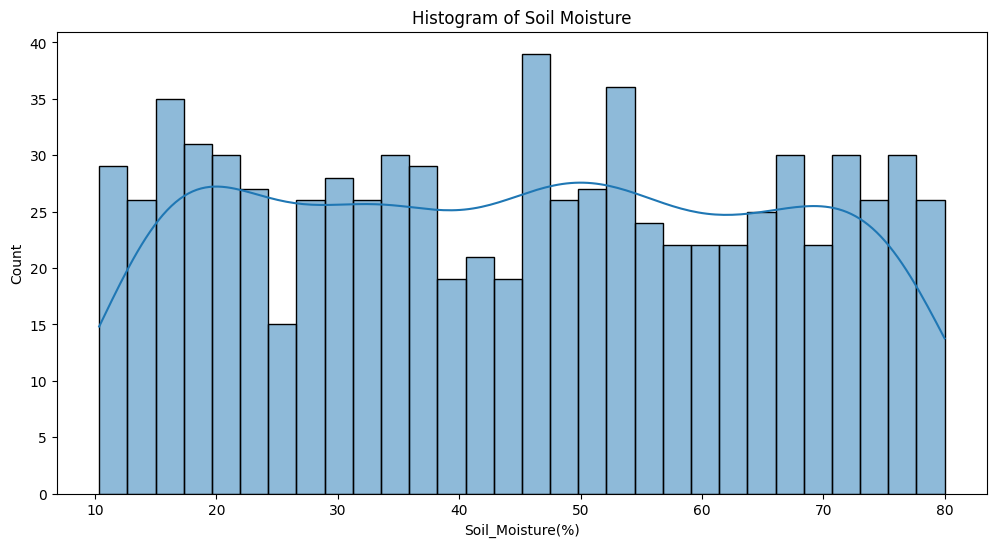

In [114]:
plt.figure(figsize=(12, 6))

sb.histplot(climate_df['Soil_Moisture(%)'], bins=30, kde=True)
plt.title('Histogram of Soil Moisture')

Text(0.5, 1.0, 'Histogram of Soil pH')

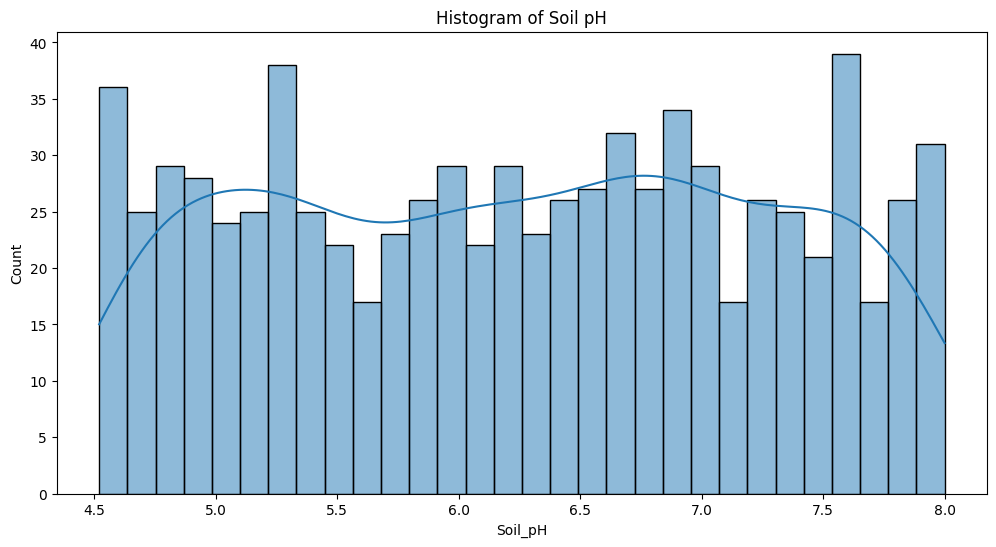

In [115]:
plt.figure(figsize=(12, 6))
sb.histplot(climate_df['Soil_pH'], bins=30, kde=True)
plt.title('Histogram of Soil pH')

Text(0.5, 1.0, 'Histogram of Temperature')

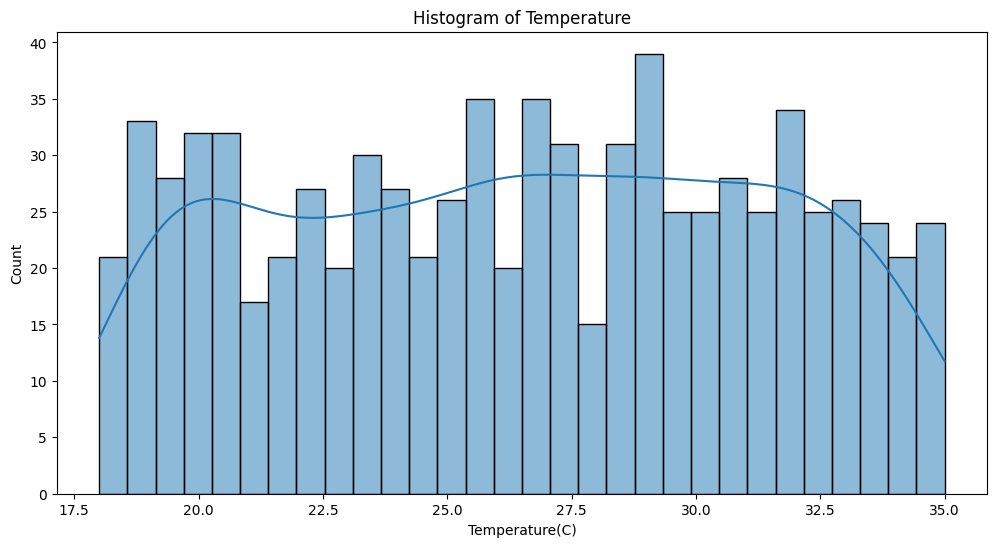

In [116]:
plt.figure(figsize=(12, 6))
sb.histplot(climate_df['Temperature(C)'], bins=30, kde=True)
plt.title("Histogram of Temperature")

Text(0.5, 1.0, 'Histogram of Humidity')

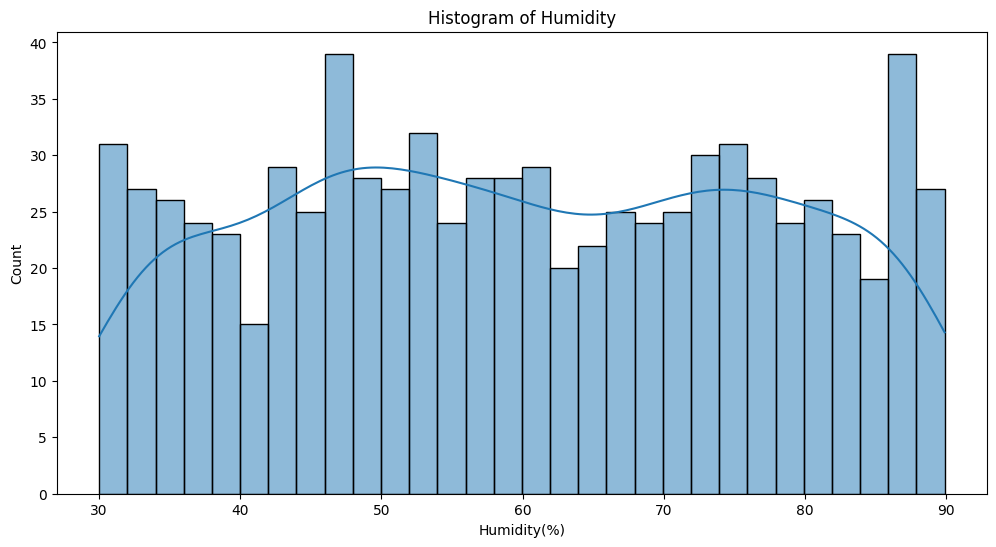

In [117]:
plt.figure(figsize=(12, 6))
sb.histplot(climate_df['Humidity(%)'], bins=30, kde=True)
plt.title('Histogram of Humidity')

Text(0.5, 1.0, 'Histogram of Fertilizer Recommendation')

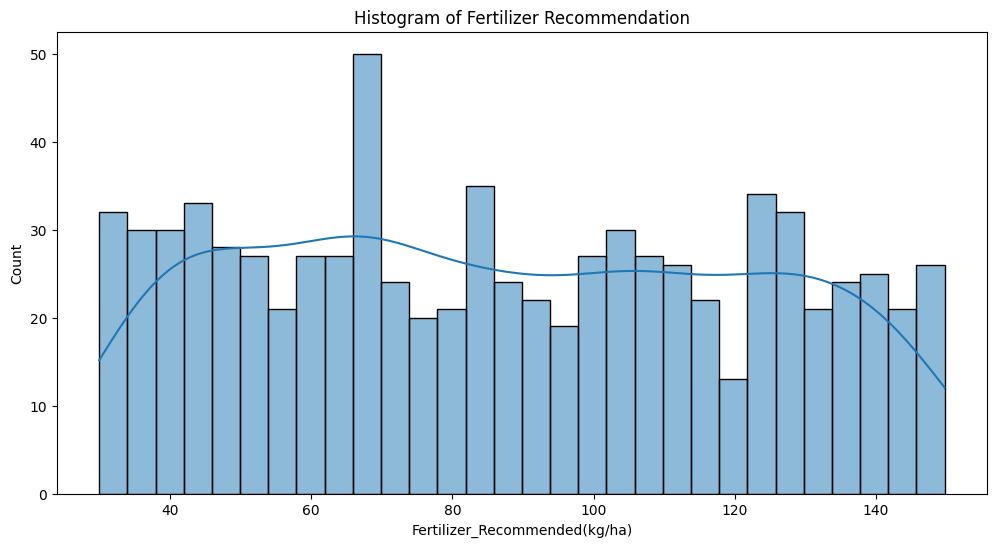

In [118]:
plt.figure(figsize=(12, 6))
sb.histplot(climate_df['Fertilizer_Recommended(kg/ha)'], bins=30, kde=True)
plt.title("Histogram of Fertilizer Recommendation")

Text(0.5, 1.0, 'Histogram of Fertilizer Recommendation')

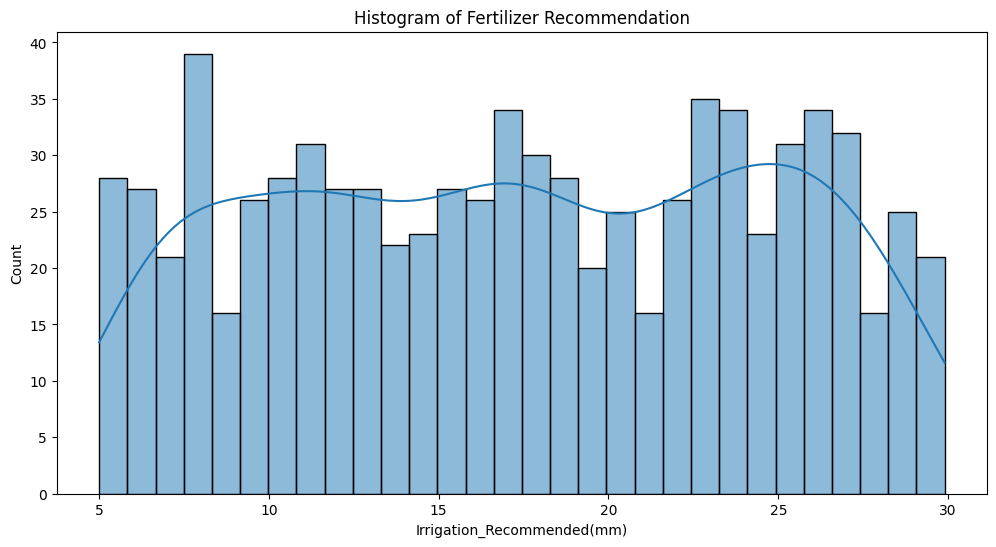

In [119]:
plt.figure(figsize=(12, 6))
sb.histplot(climate_df['Irrigation_Recommended(mm)'], bins=30, kde=True)
plt.title("Histogram of Fertilizer Recommendation")

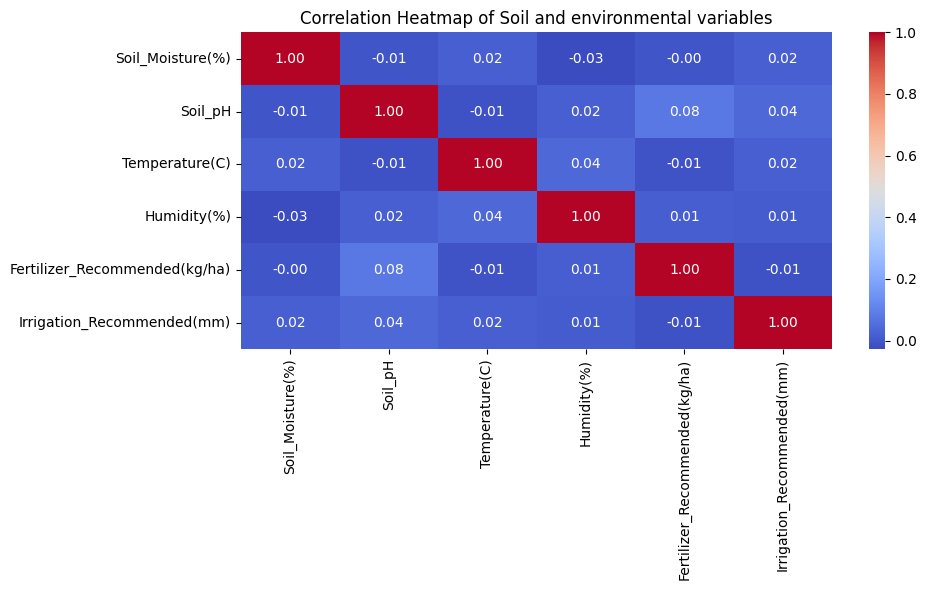

In [120]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(climate_df[numeric_cols].corr(),cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Soil and environmental variables')
plt.tight_layout()
plt.show()

In [121]:
# Variables influencing fertilizer recommendations

corrs = climate_df[numeric_cols].corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print(corrs)

Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.080868
Humidity(%)                      0.013656
Soil_Moisture(%)                -0.003808
Temperature(C)                  -0.009703
Irrigation_Recommended(mm)      -0.012491
Name: Fertilizer_Recommended(kg/ha), dtype: float64


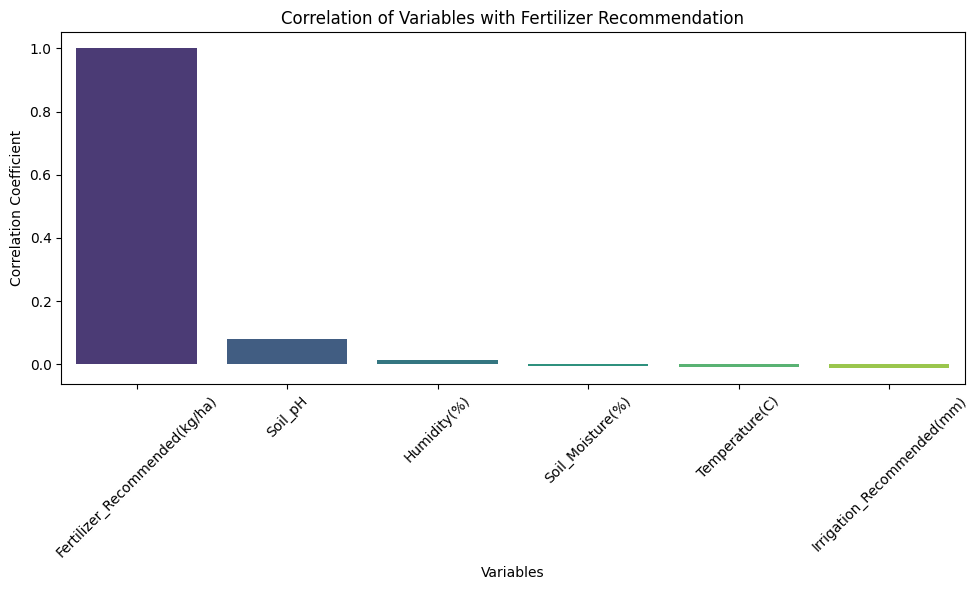

In [122]:
# Visualizing Correlation
plt.figure(figsize=(10, 6))
sb.barplot(x=corrs.index, y=corrs.values,hue=corrs.index, palette='viridis', legend=False)
plt.title('Correlation of Variables with Fertilizer Recommendation')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [123]:
# Crop with the highest average soil moisture

avg_moisture_by_crop = climate_df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
highest_moisture_crop =  avg_moisture_by_crop.idxmax()
highest_moisture_value = avg_moisture_by_crop.max()
print('Crop with the highest average soil moisture')
print(f"Crop: {highest_moisture_crop}")
print(f"Highest moisture value: {highest_moisture_value:.2f}%")
print(f"Average soil moisture by crop type")
print(avg_moisture_by_crop)


Crop with the highest average soil moisture
Crop: Wheat
Highest moisture value: 47.19%
Average soil moisture by crop type
Crop_Type
Wheat       47.185349
Maize       44.955032
Beans       44.395855
Tomatoes    43.819286
Lettuce     42.986358
Name: Soil_Moisture(%), dtype: float64


In [124]:
# Irrigation adjustment for crops with temperature > 30°C
high_temp_crop = climate_df[climate_df['Temperature(C)'] > 30].groupby('Crop_Type')
avg_moisture_high_temp = high_temp_crop['Soil_Moisture(%)'].mean()
print('Average soil moisture for crops with temperature > 30°C')
print(avg_moisture_high_temp)

# Irrigation Recommendation
for crop, moisture in avg_moisture_high_temp.items():
    if moisture < 30:
        print(f"Increase irrigation for {crop} by {moisture:.2f}%")
    else:
        print(f"Maintain or mointor irrigation for {crop} within current moisture: {moisture:.2f}%")

Average soil moisture for crops with temperature > 30°C
Crop_Type
Beans       46.549038
Lettuce     42.661892
Maize       44.885091
Tomatoes    48.647391
Wheat       42.699714
Name: Soil_Moisture(%), dtype: float64
Maintain or mointor irrigation for Beans within current moisture: 46.55%
Maintain or mointor irrigation for Lettuce within current moisture: 42.66%
Maintain or mointor irrigation for Maize within current moisture: 44.89%
Maintain or mointor irrigation for Tomatoes within current moisture: 48.65%
Maintain or mointor irrigation for Wheat within current moisture: 42.70%


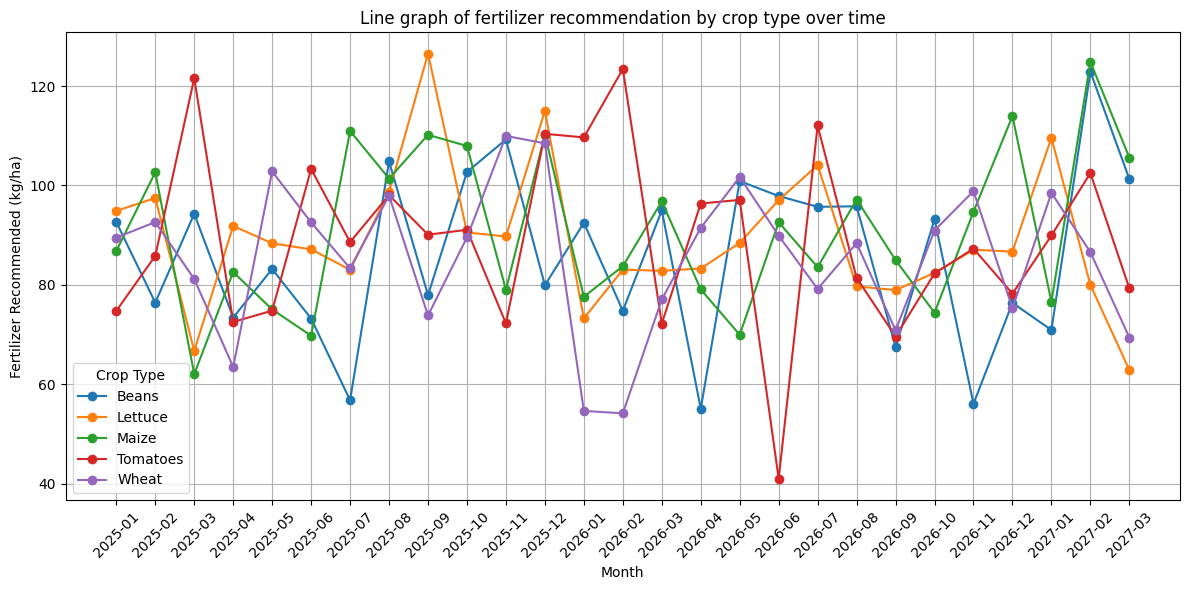

In [125]:
# Line graph for fertilizer trends by crop type
climate_df['Date'] = pd.to_datetime(climate_df['Date'])
climate_df['Month'] = climate_df['Date'].dt.to_period('M')
monthly_fert = climate_df.groupby(['Month', 'Crop_Type'])['Fertilizer_Recommended(kg/ha)'].mean().unstack()

plt.figure(figsize=(12, 6))
for crop in monthly_fert.columns:
    plt.plot(monthly_fert.index.astype(str), monthly_fert[crop], marker='o', label=crop)

plt.title('Line graph of fertilizer recommendation by crop type over time')
plt.xlabel('Month')
plt.ylabel('Fertilizer Recommended (kg/ha)')
plt.xticks(rotation=45)
plt.legend(title='Crop Type')
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
# Documentation of Insights

print("Documentation of insights and recommendation")
print('1. Dataset Cleaning')
print('-Removing duplicates based on Sensor_ID and Date')
print("-Replace 'error' entries with 'NaN' and filled numeric missing values with median")
print("-Filling missing Dates with the mode and dropped rows with missing Crop_Type")
print("-Exported cleaned dataset as cleaned_precision_agriculture_data.csv")

print("\nExploratory data analysis")
print('-Descriptive statistics show ranges: \n  Soil_moisture(%) 10.35-79.3% \n  Soil_pH 4.52-8.0 \n  Temperature(C) 18.1-34.9°C \n  Fertilizer_Recommended(kg/ha) 30.1-149.7')
print('-Histogram indicate potential right-skew in Soil_Moisture(%) and Irrigation_Recommended(mm)')
print('-Correlation Heatmap shows the relationship eg positive correlation between Soil_Moisture(%) and Irrigation_Recommended(mm)')

print("\n3. Variable influencing Fertilizer_Recommendaations")
for var, corr in corrs.items():
    if var != 'Fertilizer_Recommended(kg/ha)':
        print(f" -{var}: correlation = {corr:.2f}")
print(' -Variables with higher absolute correlations are key influencers, though weak correlation suggests complex or crop-specific factors')

print('\n4. Crop with highest average soil moisture')
print(f"-{highest_moisture_crop} has the highest average soil moisture at {highest_moisture_value:.2f}%, likely due to water retention or irrigation practices")

print("\n5. Irrigation Adjustments for high temperature")
for crop, moisture in avg_moisture_high_temp.items():
    status = "Increase irrigation" if moisture < 30 else "Maintain or monitor irrigation"
    print(f"-{crop}: {moisture:.3f}%, status: {status}")

print("\n6. Fertilizer Trends")
print('- The line graph shows monthly fertilizer recommendation by crop type by revealing seasonal patterns')

print("\n7.  Recommendations")
print("-Prioritize Soil_pH and Soil_Moisture(%) for fertilizer needs")
print(f"-Focus irrigation effort on crops like {highest_moisture_crop} to maintain optimal moisture and increase irrigation for crops below 30% moisture in high temperature")


Documentation of insights and recommendation
1. Dataset Cleaning
-Removing duplicates based on Sensor_ID and Date
-Replace 'error' entries with 'NaN' and filled numeric missing values with median
-Filling missing Dates with the mode and dropped rows with missing Crop_Type
-Exported cleaned dataset as cleaned_precision_agriculture_data.csv

Exploratory data analysis
-Descriptive statistics show ranges: 
  Soil_moisture(%) 10.35-79.3% 
  Soil_pH 4.52-8.0 
  Temperature(C) 18.1-34.9°C 
  Fertilizer_Recommended(kg/ha) 30.1-149.7
-Histogram indicate potential right-skew in Soil_Moisture(%) and Irrigation_Recommended(mm)
-Correlation Heatmap shows the relationship eg positive correlation between Soil_Moisture(%) and Irrigation_Recommended(mm)

3. Variable influencing Fertilizer_Recommendaations
 -Soil_pH: correlation = 0.08
 -Humidity(%): correlation = 0.01
 -Soil_Moisture(%): correlation = -0.00
 -Temperature(C): correlation = -0.01
 -Irrigation_Recommended(mm): correlation = -0.01
 -Variab